In [74]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

In [75]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url,sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [76]:
### z-score all variables except for quality

# find the columns we want to normalize (all except quality)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')

# z-score (written out for clarity)
for col in cols2zscore:
  meanval   = np.mean(data[col])
  stdev     = np.std(data[col],ddof=1)
  data[col] = (data[col]-meanval) / stdev

# can also do more compactly
#data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,3.554936e-16,1.688594e-16,-1.066481e-16,-1.110917e-16,3.554936e-16,-6.221137e-17,2.666202e-17,-3.469617e-14,2.861723e-15,6.665504e-16,7.109871e-17,5.636023
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.807569
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,3.000000
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,5.000000
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,6.000000
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,6.000000
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,8.000000


/tmp/ipykernel_1746338/29093033.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


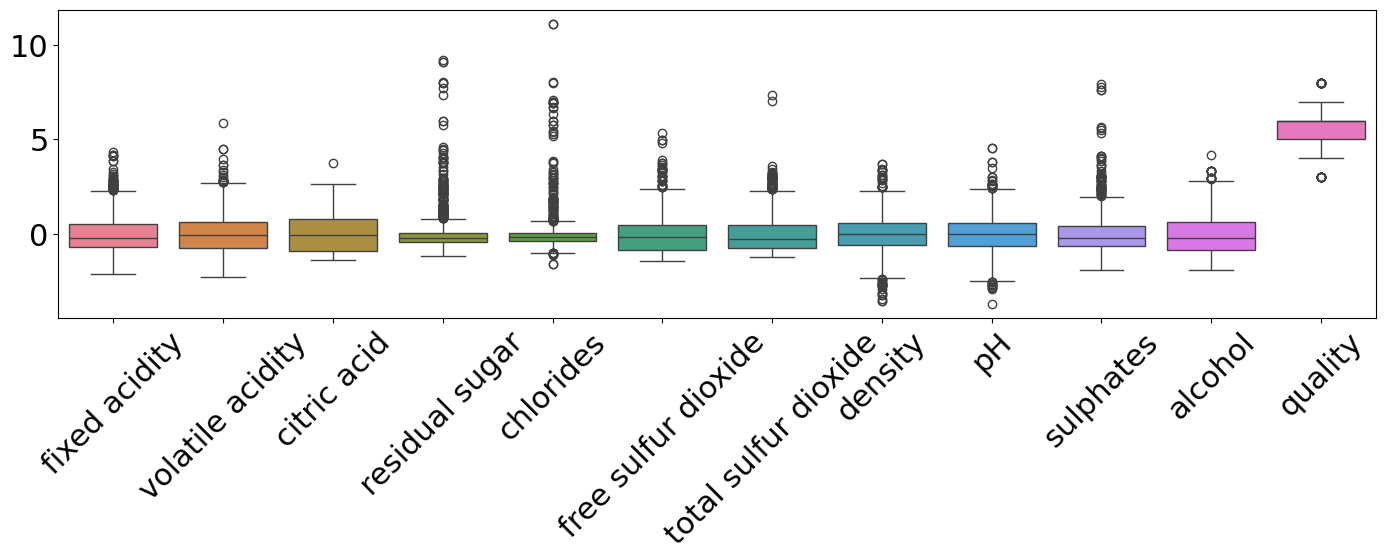

In [77]:
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

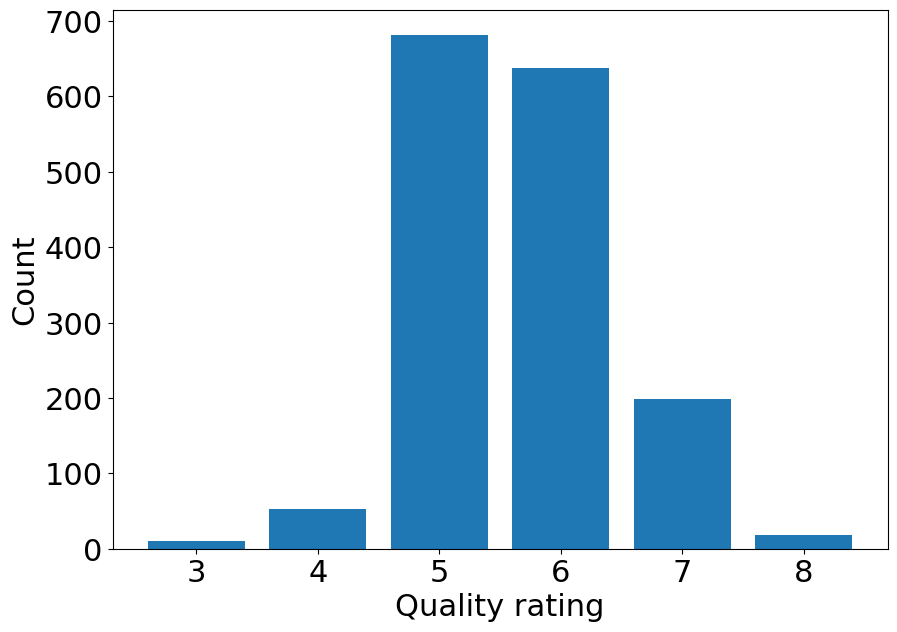

/tmp/ipykernel_1746338/501044087.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['boolQuality'][data['quality']>5] = 1
/tmp/ipykernel_1746338/501044087.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [78]:
# distribution quality values
fig = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 22}) # increase font size in the figure

counts = data['quality'].value_counts()
plt.bar(list(counts.keys()),counts)
plt.xlabel('Quality rating')
plt.ylabel('Count')
plt.show()

# create a new column for binarized (boolean) quality
data['boolQuality'] = 0
# data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
data['boolQuality'][data['quality']>5] = 1

data[['quality','boolQuality']]

In [ ]:
from sklearn.model_selection import train_test_split
import scipy.stats as stats
def loadData(N):
    # import the data
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    data = pd.read_csv(url,sep=';')
    data = data[data['total sulfur dioxide']<200] # drop a few outliers

    # z-score all columns except for quality
    cols2zscore = data.keys()
    cols2zscore = cols2zscore.drop('quality')
    data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

    # create a new column for binarized (boolean) quality
    data['boolQuality'] = 0
    # data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
    data['boolQuality'][data['quality']>5] = 1
    
    labels = data['boolQuality']
    data.drop('boolQuality', axis=1, inplace=True)
    data = torch.tensor(data.to_numpy(), dtype=torch.float32)
    labels = torch.tensor(labels.to_numpy(), dtype=torch.float32)[:,None]
    
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.2)
    
    datasetTrain = TensorDataset(X_train, y_train)    
    datasetTest = TensorDataset(X_test, y_test)
    
    train_loader = DataLoader(datasetTrain, shuffle=True, batch_size=N)
    test_loader = DataLoader(datasetTest, batch_size=datasetTest.tensors[0].shape[0])
    
    return train_loader, test_loader



def createModel():
    ann = nn.Sequential(
        nn.Linear(11,12),
        nn.ReLU(),
        nn.Linear(12,12),
        nn.ReLU(),
        nn.Linear(12,1),
        nn.Sigmoid()
    )
    
    lossfun = nn.BCE
    optimizer = torch.optim.SGD(ann.parameters(),lr=0.001)
    
    return ann, lossfun, optimizer

def trainModel(ann, lossfun, optimizer, train_loader, test_loader):
    trainAcc = []
    testAcc = []
    
    for epoch in range(1000):
        batchAcc = []
        for X,y in train_loader:
            y_pred = ann(X)
            
            loss = lossfun(y_pred,y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batchAcc.append(100*(torch.mean((y_pred>.5).float())).item())
            
            
        trainAcc.append(np.mean(batchAcc))
        X,y = next(iter(test_loader))
        y_pred = ann(X)
        testAcc.append(100*(torch.mean((y_pred>.5).float())).item())
        
    return trainAcc, testAcc
    

In [80]:
trainAcc = []
testAcc = []
for N in range(1,7):
    train_loader, test_loader = loadData(N)
    ann, lossfun, optim = createModel()
    train, test = trainModel(ann, lossfun, optim, train_loader, test_loader)
    trainAcc.append(train)
    testAcc.append(test)
    


/tmp/ipykernel_1746338/668602971.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['boolQuality'][data['quality']>5] = 1
/tmp/ipykernel_1746338/668602971.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [81]:
train = np.array(trainAcc)
test = np.array(testAcc)

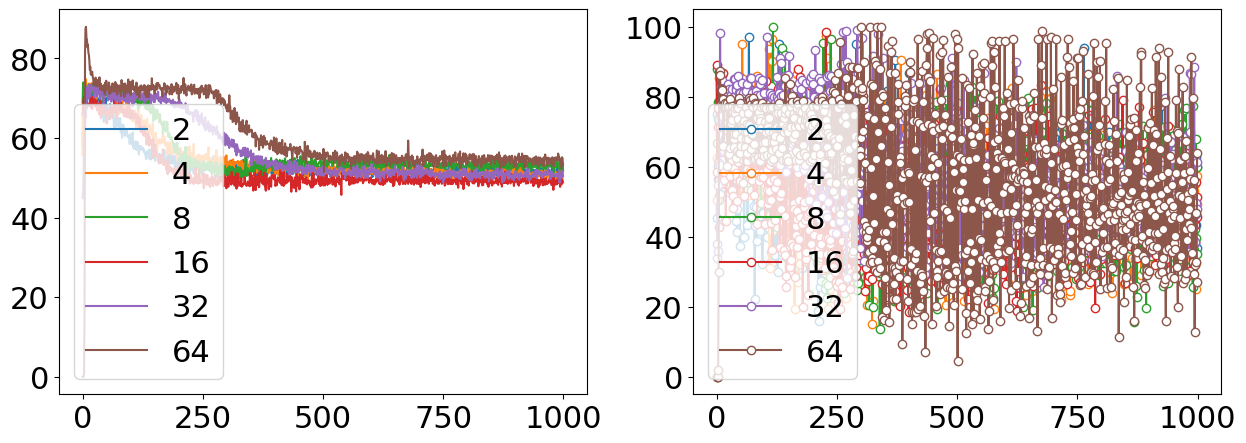

In [87]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))


ax[0].plot(train.T, "-")
ax[0].legend([str(2**i) for i in range(1, 7)])

ax[1].plot(test.T, "o-", markerfacecolor="w")
ax[1].legend([str(2**i) for i in range(1, 7)])